# ¿Cómo podemos predecir el sentimiento asociado con una interacción con el cliente?

In [2]:
!pip install -q wordcloud

You should consider upgrading via the 'c:\users\david\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install -q nltk

You should consider upgrading via the 'c:\users\david\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import os
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
rcParams['figure.figsize'] = 30, 60

%matplotlib inline

**Fuente de datos**

Modelo de incrustciones pre entrenado: https://drive.google.com/file/d/1o_ZPj9b2tO-XxYdrdNIjpSA4HBZBBKqj/view?usp=share_link

Archivo de reviews: https://drive.google.com/file/d/1bXUCEsx9DbavsaH9iKFYPt3cRY3vVCdN/view?usp=share_link

## Introduccion

**Contexto comercial.** Eres un científico de datos para una gran empresa de comercio electrónico. Tienes decenas de miles de clientes que escriben reseñas sobre productos cada día. Cada revisión contiene comentarios textuales junto con un sistema de calificación de 1 a 5 estrellas (siendo 1 la menos satisfecha y 5 la más satisfecha). También tiene un equipo de atención al cliente que interactúa con los clientes a través de servicios de llamadas y mensajes. Su empresa también recopila comentarios sobre las experiencias de sus clientes con la interacción del sitio web después de cada compra. Ni este comentario ni el servicio de mensajería tienen un número de calificación. La empresa quiere cuantificar la satisfacción del cliente proveniente de estas interacciones no calificadas para ayudar con futuras decisiones comerciales (por ejemplo, determinar qué tan bien se están desempeñando sus diversos agentes de servicio al cliente).

**Problema comercial.** Su tarea es **construir modelos que puedan identificar el sentimiento (positivo o negativo) de cada una de estas interacciones no clasificadas**.

**Contexto analítico.** Los datos son un conjunto de reseñas en formato de archivo CSV. Combinaremos lo que aprendimos sobre el procesamiento de texto y los modelos de clasificación para desarrollar algoritmos capaces de clasificar las interacciones por sentimiento.

El caso está estructurado de la siguiente manera: 1) leeremos y analizaremos los datos del texto de entrada y las variables de respuesta correspondientes (calificaciones); 2) realizaremos un preprocesamiento básico para preparar los datos para el modelado; 3) aprenderemos y aplicaremos varias formas de caracterizar el texto de reseñas; y finalmente 4) construiremos modelos de aprendizaje automático para clasificar el texto como mostrando un sentimiento positivo o negativo (1 o 0).

## Leyendo la data


In [2]:
amazon_reviews = pd.read_csv('Reviews.csv')
## Elegimos solo los primeros 10000 por memoria
amazon_reviews = amazon_reviews[:10000]
## Cambiando los nombres de las columnas para que no tengan puntos (.)
#amazon_reviews.columns = [each.replace(".","_") for each in amazon_reviews.columns]

In [3]:
amazon_reviews

Id   ProductId          UserId                      ProfileName  \
0         1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1         2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2         3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3         4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4         5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...     ...         ...             ...                              ...   
9995   9996  B000P41A28  A3A63RACXR1XIL            A. Boodhoo "deaddodo"   
9996   9997  B000P41A28    A5VVRGL8JA7R                             Adam   
9997   9998  B000P41A28  A2TGDTJ8YCU6PD                          geena77   
9998   9999  B000P41A28   AUV4GIZZE693O              Susan Coe "sueysis"   
9999  10000  B000P41A28   A82WIMR4RSVLI                       Emrose mom   

      HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                        1                       1      5  1303862400   
1                        0                       0      1  1346976000   
2                        1                       1      4  1219017600   
3                        3                       3      2  1307923200   
4                        0                       0      5  1350777600   
...                    ...                     ...    ...         ...   
9995                    10                      15      1  1204502400   
9996                     2                       3      5  1306368000   
9997                     0                       0      5  1347494400   
9998                     1                       2      5  1203638400   
9999                     0                       1      4  1337472000   

                               Summary  \
0                Good Quality Dog Food   
1                    Not as Advertised   
2                "Delight" says it all   
3                       Cough Medicine   
4                          Great taffy   
...                                ...   
9995                      constipation   
9996  Constipation Not A Problem if...   
9997                Love this formula!   
9998                   very convenient   
9999        The best weve tried so far   

                                                   Text  
0     I have bought several of the Vitality canned d...  
1     Product arrived labeled as Jumbo Salted Peanut...  
2     This is a confection that has been around a fe...  
3     If you are looking for the secret ingredient i...  
4     Great taffy at a great price.  There was a wid...  
...                                                 ...  
9995  we switched from the advance similac to the or...  
9996  Like the bad reviews say, the organic formula ...  
9997  I wanted to solely breastfeed but was unable t...  
9998  i love the fact that i can get this delieved t...  
9999  We have a 7 week old... He had gas and constip...  

[10000 rows x 10 columns]

Veamos la distribución del número de palabras por reseña:

In [5]:
h= "Hola como estas soy yo"
#len(h.split(" "))
len(h.split(" "))

5

Text(0.5, 1.0, 'Distribucion palabras / comentario')

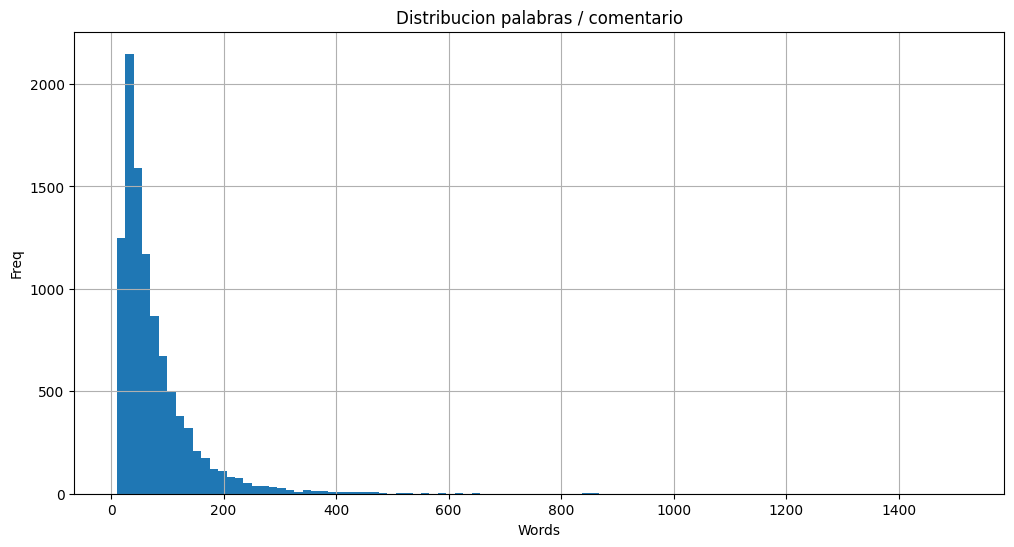

In [4]:
import matplotlib.pyplot as plt
words_per_review = amazon_reviews.Text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100,figsize=(12,6))
plt.xlabel('Words')
plt.ylabel('Freq')
plt.title('Distribucion palabras / comentario')

In [5]:
words_per_review.mean()

77.9028

Ahora miremos la distribucion de los ratings:

In [6]:
amazon_reviews.Score.value_counts()

Score
5    6183
4    1433
1     932
3     862
2     590
Name: count, dtype: int64

In [7]:
percent_val = 100 * amazon_reviews.Score.value_counts()/amazon_reviews.shape[0]
percent_val

Score
5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: count, dtype: float64

<Axes: xlabel='Score'>

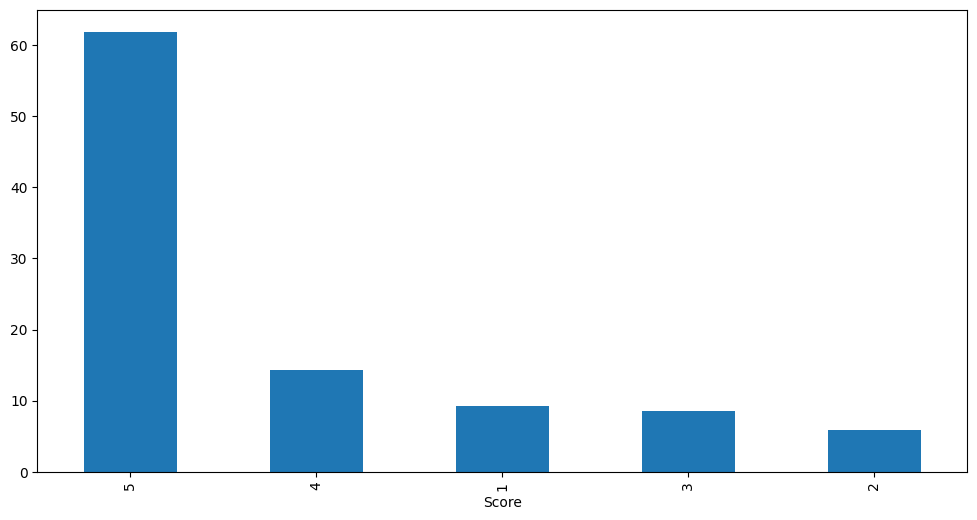

In [8]:
percent_val.plot.bar(figsize=(12,6))

La distribución es bastante sesgada, con un gran número de 5 y muy pocos 3, 2 y 1.

### Ejercicio 1

Cree una nube de palabras para las reseñas de productos.

In [9]:
''.join(amazon_reviews.Text[:10000])

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.If you are looking for the secret in

4157740


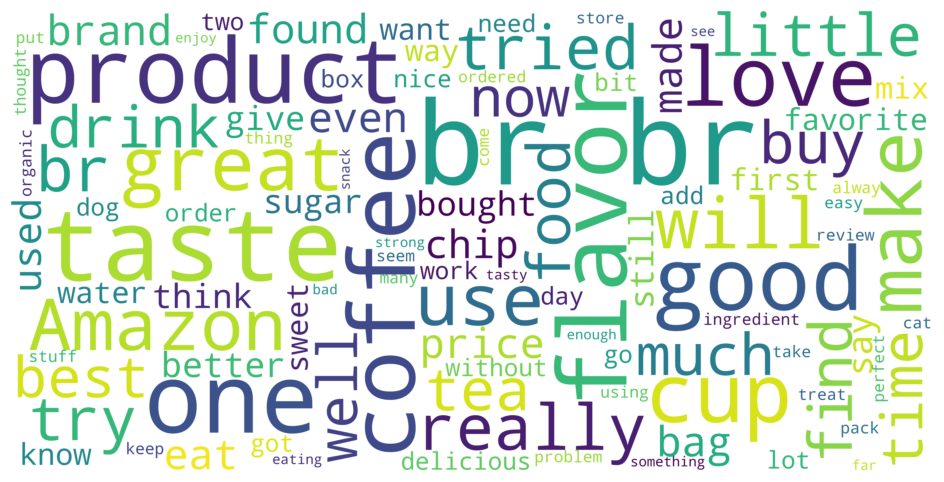

In [10]:
word_cloud_text = ''.join(amazon_reviews.Text[:10000])
print(len(word_cloud_text))
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear",cmap='jet')
plt.axis("off")
plt.show()

La nube de palabras indica que muchas de las reseñas hablan de cosas relacionadas con la comida: café, sabor, comida, sabor, bebida. También vemos algunas palabras positivas como bueno, amor, mejor.

### Estandarización de ratings para análisis de sentimiento

Para fines de análisis de sentimiento, convertiremos todas las calificaciones en valores binarios utilizando la siguiente regla: las calificaciones de 4 o 5 se asignarán a 1, las calificaciones de 1 o 2 se asignarán a 0 y las calificaciones de 3 se dejaran por fuera.

In [11]:
amazon_reviews['Sentiment_rating'] = np.where(amazon_reviews.Score > 3,1,0)
amazon_reviews['Sentiment_rating'].value_counts()

Sentiment_rating
1    7616
0    2384
Name: count, dtype: int64

In [12]:
##Removiendo la categoria neutral por ahora
amazon_reviews = amazon_reviews[amazon_reviews['Score'] != 3]

<Axes: xlabel='Sentiment_rating'>

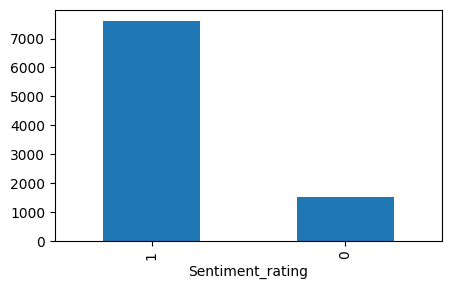

In [13]:
rcParams['figure.figsize'] = 5, 3
#plt.figure(figsize=(12,6))
amazon_reviews.Sentiment_rating.value_counts().plot.bar()

In [14]:
amazon_reviews[['Text','Sentiment_rating']]

Text  Sentiment_rating
0     I have bought several of the Vitality canned d...                 1
1     Product arrived labeled as Jumbo Salted Peanut...                 0
2     This is a confection that has been around a fe...                 1
3     If you are looking for the secret ingredient i...                 0
4     Great taffy at a great price.  There was a wid...                 1
...                                                 ...               ...
9995  we switched from the advance similac to the or...                 0
9996  Like the bad reviews say, the organic formula ...                 1
9997  I wanted to solely breastfeed but was unable t...                 1
9998  i love the fact that i can get this delieved t...                 1
9999  We have a 7 week old... He had gas and constip...                 1

[9138 rows x 2 columns]

## Pre-procesamiento

Como se discutió anteriormente, el preprocesamiento y la normalización del texto son cruciales antes de construir un modelo NLP adecuado. Algunos de los pasos importantes son:

1. convertir palabras a minúsculas/mayúsculas
2. eliminar caracteres especiales
3. eliminar palabras vacías y palabras de alta/baja frecuencia
4. Stemming/lematización

Procedamos en orden. Comencemos convirtiendo todas las palabras en un formato de mayúsculas y minúsculas consistente, digamos en minúsculas:

In [15]:
amazon_reviews['reviews_text_new'] = amazon_reviews.Text.apply(lambda x: x.lower())

C:\Users\david\AppData\Local\Temp\ipykernel_9260\176585120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews['reviews_text_new'] = amazon_reviews.Text.apply(lambda x: x.lower())


In [16]:
nltk.download("punkt") # Descargar signos de puntacion

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk import word_tokenize, sent_tokenize
word_tokenize('Hola como estas, estoy esperando: 1.')
sent_tokenize("Hola como estas. Bien y tu. ")

['Hola como estas.', 'Bien y tu.']

In [18]:
from nltk import word_tokenize

token_lists = [word_tokenize(each) for each in amazon_reviews.Text]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos antes: ",len(set(tokens)))

token_lists_lower = [word_tokenize(each) for each in amazon_reviews.reviews_text_new]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Numero de token unicos ahora: ",len(set(tokens_lower)))

Numero de tokens unicos antes:  27509
Numero de token unicos ahora:  22473


In [19]:
(27510-22474)/22474*100

22.408116045207795

La cantidad de tokens se ha reducido en ~22% solo por normalizar el caso.

### Ejercicio 2

¿Es la eliminación de caracteres especiales incluso una buena idea? ¿Cuáles son algunos ejemplos de caracteres que probablemente sería seguro eliminar y cuáles no?

**Respuesta.** Eliminar caracteres especiales es una decisión subjetiva, especialmente en casos como este. Las personas a menudo usan caracteres especiales para expresar sus emociones y pueden dejar una reseña como _'¡Este producto es el peor!'_, mientras que una reseña positiva podría ser _'¡Este producto es el mejor! ¡Me encantó!'_ Aquí, la presencia de signos de exclamación indica claramente algo sobre el sentimiento subyacente, por lo que eliminarlos puede no ser una buena idea.

Por otro lado, eliminar la puntuación sin carga emocional, como las comas, los puntos y el punto y coma, probablemente sea seguro.

En aras de la simplicidad, procederemos eliminando todos los caracteres especiales; sin embargo, vale la pena tener en cuenta que esto es algo para revisar dependiendo de los resultados que obtengamos más adelante. Lo siguiente da una lista de todos los caracteres especiales en nuestro conjunto de datos:

In [22]:
x= 'david27437464'
x.isalnum()

True

In [20]:
spl_chars = amazon_reviews.reviews_text_new.apply(lambda x: [each for each in list(x) if not each.isalnum() and each != ' '])
spl_chars

0                                               [., ., .]
1                                   [., ., ., ., ", ", .]
2       [., ,, -, ., ., ., ,, ., ., ., ., ', ", ,, ,, ...
3                                         [., (, ), ., .]
4                                         [., ., ., ,, .]
                              ...                        
9995                                            [., ., .]
9996    [,, ., ,, (, -, ), ., ', ., ', ,, ,, ., <, /, ...
9997    [., ., ., ., ., ., ., ,, ., ., ,, ,, (, ), ., ...
9998                                                  [.]
9999    [., ., ., ., ., ., ', ,, ., <, /, >, ., ,, ., ...
Name: reviews_text_new, Length: 9138, dtype: object

In [21]:
lista_vacia=[]
for i in spl_chars:
    for j in i:
        lista_vacia.append(j)
set(lista_vacia)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '§',
 '®'}

In [22]:
### Seleccionar caracteres no alfanuméricos que no sean espacios
spl_chars = amazon_reviews.reviews_text_new.apply(lambda x: [each for each in list(x) if not each.isalnum() and each != ' '])

## Obteniendo todo en una lista
flat_list = [item for sublist in spl_chars for item in sublist]

## Caracteres especiales unicos
print(len(flat_list))
print(len(set(flat_list)))
set(flat_list)

148403
32


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '§',
 '®'}

Eliminemos estos caracteres especiales de las reseñas:

In [23]:
import re
review_backup = amazon_reviews.reviews_text_new.copy()
amazon_reviews.reviews_text_new = amazon_reviews.reviews_text_new.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

C:\Users\david\AppData\Local\Temp\ipykernel_9260\3315007692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews.reviews_text_new = amazon_reviews.reviews_text_new.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))


Podemos ver cómo cambian nuestras reseñas después de eliminar estas:

In [24]:
print("Old Review:")
review_backup.values[5]

Old Review:


'i got a wild hair for taffy and ordered this five pound bag. the taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. my only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). between me, my kids, and my husband, this lasted only two weeks! i would recommend this brand of taffy -- it was a delightful treat.'

In [25]:
print("New Review:")
amazon_reviews.reviews_text_new[7]

New Review:


'this taffy is so good   it is very soft and chewy   the flavors are amazing   i would definitely recommend you buying it   very satisfying '

El número de tokens únicos se ha reducido aún más:

In [26]:
token_lists = [word_tokenize(each) for each in amazon_reviews.Text]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de token unicos antes: ",len(set(tokens)))

token_lists = [word_tokenize(each) for each in amazon_reviews.reviews_text_new]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de token unicos despues: ",len(set(tokens)))

Numero de token unicos antes:  27509
Numero de token unicos despues:  18039


In [27]:
((27509-18039)/27509)*100

34.42509724090298

### Stopwords y palabras de alta/baja frecuencia

Como se discutió anteriormente, las palabras vacías ocurren naturalmente con mucha frecuencia en el idioma inglés sin agregar ninguna idea específica del contexto. Tiene sentido eliminarlos:

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stopwords_corpus = nltk.corpus.stopwords
print(len(stopwords_corpus.words('english')))
print(stopwords_corpus.words('english'))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [30]:
noise_words = []
stopwords_corpus = nltk.corpus.stopwords
eng_stop_words = stopwords_corpus.words('english')
noise_words.extend(eng_stop_words)
noise_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [34]:
len(noise_words)

179

### Ejercicio 3

Encuentre las palabras de alta y baja frecuencia, que definiremos como el 1 % de las palabras que aparecen con más frecuencia en las reseñas, así como definir el 1 % de las palabras que aparecen con menos frecuencia en las reseñas (después de ajustar por mayúsculas y minúsculas). caracteres especiales).

In [35]:
len(tokens)

710516

In [31]:
one_percentile = int(len(set(tokens)) * 0.01)
top_1_percentile = Counter(tokens).most_common(one_percentile)
top_1_percentile[:20]

[('the', 28122),
 ('i', 25705),
 ('and', 19980),
 ('a', 18505),
 ('it', 16143),
 ('to', 15137),
 ('of', 12067),
 ('is', 11063),
 ('this', 10530),
 ('br', 9361),
 ('for', 8233),
 ('in', 7940),
 ('my', 6786),
 ('that', 6494),
 ('you', 5662),
 ('with', 5605),
 ('but', 5450),
 ('have', 5292),
 ('not', 5106),
 ('are', 4919)]

In [32]:
bottom_1_percentile = Counter(tokens).most_common()[-one_percentile:]
bottom_1_percentile[:20]

[('pruchase', 1),
 ('slick', 1),
 ('cloured', 1),
 ('innocuous', 1),
 ('espensive', 1),
 ('marketer', 1),
 ('strofoam', 1),
 ('destroyers', 1),
 ('ruth', 1),
 ('gleaning', 1),
 ('fantasies', 1),
 ('unexpexctedly', 1),
 ('emporium', 1),
 ('calmatives', 1),
 ('relievers', 1),
 ('custumers', 1),
 ('molases', 1),
 ('0303', 1),
 ('explination', 1),
 ('ethel', 1)]

In [38]:
len(noise_words)

179

In [33]:
noise_words.extend([word for word,val in top_1_percentile])
noise_words.extend([word for word,val in bottom_1_percentile])

In [34]:
len(list(set(noise_words)))

453

Ahora se han agregado palabras vacías y palabras de alta/baja frecuencia a `noise_words`, que se eliminarán de las revisiones antes de entrenar modelos de aprendizaje automático.

### Stemming & lemmatizacion

Ahora estamos listos para la última parte de nuestro procesamiento previo: **lematización y stemming**.

Las diferentes formas de una palabra a menudo comunican esencialmente el mismo significado. Por ejemplo, probablemente no haya diferencia en la intención entre una búsqueda de "zapato" y una búsqueda de "zapatos". La misma palabra también puede aparecer en diferentes tiempos; p.ej. "correr", "corres" y "corriendo". Estas diferencias sintácticas entre las formas de las palabras se llaman **inflexiones**. En general, probablemente queramos tratar las inflexiones de manera idéntica cuando destacamos nuestro texto.

A veces, este proceso es casi reversible y bastante seguro (por ejemplo, reemplazar los verbos con su infinitivo, de modo que "run", "runs" y "running" se conviertan en "run"). Otras veces es un poco peligroso y depende del contexto (por ejemplo, reemplazar los superlativos con su forma base, de modo que "bueno", "mejor" y "mejor" se conviertan en "bueno"). Cuanto más agresivo sea, mayores serán las posibles recompensas y riesgos. Para un ejemplo muy agresivo, puede elegir reemplazar "Zeus" y "Júpiter" solo con "Zeus"; esto podría estar bien si está resumiendo mitos, confuso si está trabajando en astronomía y desastroso si está trabajando en mitología comparada.

No entraremos en los detalles de las diferencias entre lematización, stemming y otros tipos de normalización de texto aquí, pero se puede encontrar una introducción cuidadosa en: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html.



In [58]:
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...


**Algoritmos de Stemming** trabajan cortando el final o el principio de la palabra, teniendo en cuenta una lista de prefijos y sufijos comunes que se pueden encontrar.

Por otro lado, la **lematización** toma en consideración el análisis morfológico de las palabras. Por lo tanto, la lematización tiene en cuenta la gramática de la palabra e intenta encontrar la palabra raíz en lugar de simplemente llegar a la palabra raíz mediante métodos de fuerza bruta.

In [59]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Otro metodo
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


Se puede ver que obtenemos una raíz de significado de Lemmatizer, mientras que Stemmer simplemente recorta y extrae la primera parte importante de la palabra.

## Creando el modelo ML

Ahora tenemos versiones limpias de dos datos muy importantes: el texto de revisión real y su calificación de sentimiento correspondiente:

In [35]:
amazon_reviews[['Text','Score','Sentiment_rating','reviews_text_new']].head(5)

Text  Score  Sentiment_rating  \
0  I have bought several of the Vitality canned d...      5                 1   
1  Product arrived labeled as Jumbo Salted Peanut...      1                 0   
2  This is a confection that has been around a fe...      4                 1   
3  If you are looking for the secret ingredient i...      2                 0   
4  Great taffy at a great price.  There was a wid...      5                 1   

                                    reviews_text_new  
0  i have bought several of the vitality canned d...  
1  product arrived labeled as jumbo salted peanut...  
2  this is a confection that has been around a fe...  
3  if you are looking for the secret ingredient i...  
4  great taffy at a great price   there was a wid...

Las variables independientes o características del modelo se derivan del texto de revisión. Previamente, discutimos cómo podemos usar n-gramas para crear características, y específicamente cómo la bolsa de palabras es la interpretación más simple de estos n-gramas, sin tener en cuenta el orden y el contexto por completo y solo enfocándonos en la frecuencia/recuento. Usemos eso como punto de partida.

### Bag-of-words
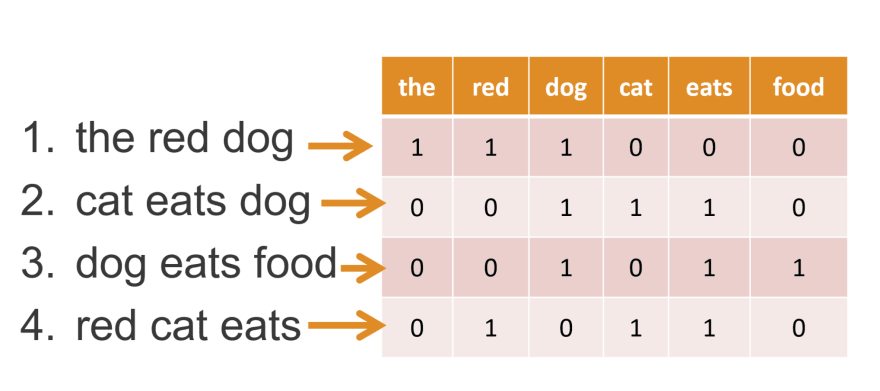

`CountVectorizer` es una clase de Python que da cuenta automáticamente de ciertos pasos de preprocesamiento, como la eliminación de palabras vacías, la stemming, la creación de n-gramas y la tokenización de palabras:

In [45]:
### Creando el metodo para stemming
"""
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
"""

'\nfrom nltk.stem import PorterStemmer\nstemmer = PorterStemmer()\nanalyzer = CountVectorizer().build_analyzer()\n\ndef stemmed_words(doc):\n    return (stemmer.stem(w) for w in analyzer(doc))\n'

Usemos esto para crear una bolsa de palabras de las reseñas, excluyendo las palabras irrelevantes que identificamos anteriormente:

"Hi how are you"
- n = 1 Hi, how, are , you (Unigrams)
- n= 2, Hi how, how are, are you (bigramas)
- n= 3, Hi how are, how are you (trigramas)

In [36]:
###Creando un objeto python de la clase CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize, stop_words=noise_words,ngram_range=(1,1))

bow_data = bow_counts.fit_transform(amazon_reviews.reviews_text_new)

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'might', 'must', "n't", 'need', 'sha', 'wo'] not in stop_words.
  warnings.warn(


In [37]:
type(bow_data)

scipy.sparse._csr.csr_matrix

In [38]:
bow_data

<9138x17616 sparse matrix of type '<class 'numpy.int64'>'
	with 218332 stored elements in Compressed Sparse Row format>

Una vez que se prepara la bolsa de palabras, el conjunto de datos debe dividirse en conjuntos de entrenamiento y prueba:

In [39]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow =  \
                            train_test_split(bow_data,amazon_reviews.Sentiment_rating,test_size = 0.2,random_state = 42)

In [40]:
y_test_bow.value_counts()/y_test_bow.shape[0]

Sentiment_rating
1    0.845733
0    0.154267
Name: count, dtype: float64

In [41]:
y_train_bow.value_counts()/y_train_bow.shape[0]

Sentiment_rating
1    0.830369
0    0.169631
Name: count, dtype: float64

Los datos de prueba contienen 84% de opiniones positivas. Entonces, si tuviéramos que clasificar ingenuamente todas las reseñas como positivas, nuestro modelo lograría una precisión del 84 %. Por lo tanto, esta es la línea de base que debe superar cualquier modelo que creemos.

### Modelo de regresion logistica

Entrenemos el modelo en nuestros datos de entrenamiento y ejecutemos el modelo resultante en nuestros datos de prueba:

In [42]:
### Entrenando el modelo
lr_model_all = LogisticRegression(C = 1)
lr_model_all.fit(X_train_bow,y_train_bow)

LogisticRegression(C=1)

In [43]:
## Prediccion
test_pred_lr_prob = lr_model_all.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all.predict(X_test_bow)

print("F1 score: ",f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

F1 score:  0.9363579080025205
Accuracy:  88.94967177242889


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test_bow, y_pred=test_pred_lr_all))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       282
           1       0.91      0.96      0.94      1546

    accuracy                           0.89      1828
   macro avg       0.81      0.73      0.76      1828
weighted avg       0.88      0.89      0.88      1828



In [45]:
test_pred_lr_all 

array([1, 0, 1, ..., 1, 1, 1])

In [46]:
prob = [each[1] for each in test_pred_lr_prob]
prob

[0.9623775301665589,
 0.2727310457852303,
 0.994365386361314,
 0.9044633190039458,
 0.9377205268556096,
 0.2428083016682734,
 0.8806275735552188,
 0.90517962711128,
 0.766710183155122,
 0.7648057016410164,
 0.8827338145164724,
 0.1878416632447726,
 0.9956962703101442,
 0.9893286439722483,
 0.9861964563825548,
 0.9991767064927645,
 0.9635266767436214,
 0.9266328414068542,
 0.9777927014114556,
 0.5656150916531435,
 0.9690098457174682,
 0.9241224846469385,
 0.8656576824100584,
 0.014008574581490402,
 0.9891850138660128,
 0.9999934699252335,
 0.3455652378226154,
 0.9770662383579376,
 0.8202246103696773,
 0.8894833596540556,
 0.8117303529325642,
 0.8522807919162875,
 0.7574051906462562,
 0.9988598163951629,
 0.9281269497369423,
 0.941986227445474,
 0.9000027417151558,
 0.9776175385087118,
 0.9916782111125042,
 0.3285769399265444,
 0.9881147211405074,
 0.004137589752856956,
 0.8310971359491521,
 0.8981544819287778,
 0.9211205013102236,
 0.9971523730946084,
 0.8458629881996685,
 0.96685362794

In [47]:
X_test_bow.indices

array([14326,  4617, 11450, ...,   240,  1892,  7112])

In [48]:
prob = [each[1] for each in test_pred_lr_prob]

predictions = pd.DataFrame(list(zip(amazon_reviews[amazon_reviews.index.isin(X_test_bow.indices)].Text.values,
                             amazon_reviews[amazon_reviews.index.isin(X_test_bow.indices)].Score.values,
                             test_pred_lr_all,
                             prob)),
                            columns = ['Review','Actual_Score','Predicted_Sentiment','Predicted_probability'])

In [49]:
predictions.tail(10)

Review  Actual_Score  \
1818  I have used Bisquick forever and now that I ha...             5   
1819  This mix is great for biscuits, snicker doodle...             5   
1820  I have been Gluten Free Since 2003 and this is...             1   
1821  Now if you could just make it sugar-free also?...             2   
1822  Ok--I just bought BIsquick GF and the first th...             4   
1823  It is very nice to be able to have biscuits ag...             5   
1824  Love this!  It's so good and makes perfect pan...             5   
1825  For those with gluten allergies, this is great...             5   
1826  I read lots of good reviews and loved the idea...             2   
1827  This product is BEYOND AMAZING! I have been co...             5   

      Predicted_Sentiment  Predicted_probability  
1818                    0               0.136924  
1819                    1               0.999444  
1820                    1               0.774769  
1821                    1               0.989840  
1822                    1               0.983237  
1823                    0               0.092011  
1824                    1               0.971357  
1825                    1               0.978566  
1826                    1               0.698673  
1827                    1               0.664116

### Ejercicio 4

Mire las tres revisiones para las que el modelo predijo las puntuaciones más bajas y vea si se pronosticaron correctamente. Si no, explique por qué se pronosticaron incorrectamente.

In [59]:
predictions.sort_values(['Predicted_probability'], ascending = True)[:3].values

array([["I tried this gum after Trident cinnamon became hard to find a couple of years ago.  (Trident told me that they were overhauling the plant that made the gum so it was in short supply but it would be back.)  I quickly discovered that the Flare 5 was far superior to the Trident and I haven't looked back.  It does last a long, long, long, time.  Unfortunatley, as other reviewers noted, it has become very hard to find in stores.  Trident cinnamon is everywhere but now I don't want it.  Amazon saves the day again.",
        5, 0, 6.087264954135827e-13],
       ['i have ordered mackerel several times on amazon and most pleased with SEASONS brand than any other. seems to me the fish are smaller therefore less mercury.<br />packed in olive oil is also a bonus. they are not as "fishy" as others that i have tried. i eat them to get a healthy serving of omega 3. my 11 year old boy has taken a liking for them as well as my 14 year old daughter. we put a small chunk on a cracker and top wit

In [60]:
predictions.sort_values(['Predicted_probability'], ascending = False)[:3].values

array([['We love strawberries dipped in chocolate but locally we could not find the dark chocolate type - so glad we found this at Amazon - it is WONDERFUL!',
        5, 1, 0.9999999999994742],
       ["I tried to find the ingredients for this hot cocoa before I bought it, but couldn't find anything online. Turns out it has one of those mile long ingredient lists, and yet, that didn't help the taste at all. It is awful.<br /><br />I had three boxes of the stuff sitting around for a month and couldn't find any takers. I finally got rid it of it at the Christmas White Elephant gift exchange at work. I put it with a nice cookbook, which was the real present, and wrapped it real prettily. Unfortunately, the boss ended up with it. I haven't asked him if his family enjoyed it because I don't want to put him on the spot. Judging by the reviews, there are a lot of people who like it - hopefully, he will, too. Maybe it just depends on how your taste buds are trained. Mine grew up with hot choco

La primera y la tercera revisión se predijeron incorrectamente. No está claro por qué la primera reseña obtuvo una mala puntuación (no hay palabras negativas obvias allí), pero la tercera reseña tiene varias palabras negativas como "no son", "no", "falta", "negativo". ", a pesar de que en contexto estas palabras no significan mucho. Claramente, presentar nuestro texto con 1-grams no puede capturar el contexto general de las reseñas.

### Ejercicio 5

Modifique el conjunto de características en el modelo para incluir bigramas, trigramas y 4-gramas. No elimine las palabras irrelevantes definidas anteriormente antes de presentarlas. (Ayuda: pon `ngram_range=(1,4)`.)

In [50]:
### Cambios con respecto al código anterior
### 1. Aumentar los n-gramas de solo tener 1 gramo a (1 gramo, 2 gramos, 3 gramos y 4 gramos)
### 2. Incluir las palabras vacías en la bolsa de características de las palabras

bow_counts = CountVectorizer(tokenizer= word_tokenize,stop_words=noise_words,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(amazon_reviews.reviews_text_new)

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'might', 'must', "n't", 'need', 'sha', 'wo'] not in stop_words.
  warnings.warn(


In [51]:
# Observe el aumento de funciones con la inclusión de palabras vacías
bow_data

<9138x631193 sparse matrix of type '<class 'numpy.int64'>'
	with 904584 stored elements in Compressed Sparse Row format>

In [52]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow =  \
                            train_test_split(bow_data,amazon_reviews.Sentiment_rating,test_size = 0.2,random_state = 0)

In [53]:
### Cambios en la regresión logística
### Cambiando el parámetro de costo C para que sea 0.9
lr_model_all_new = LogisticRegression(C = 0.9, penalty= 'l2')

In [54]:
# entrenamiento del model
lr_model_all_new.fit(X_train_bow,y_train_bow)

# Prediccion del output
test_pred_lr_prob = lr_model_all_new.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ",f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

F1 score:  0.9418282548476453
Accuracy:  89.66083150984683


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test_bow, y_pred=test_pred_lr_all))

              precision    recall  f1-score   support

           0       0.84      0.39      0.54       278
           1       0.90      0.99      0.94      1550

    accuracy                           0.90      1828
   macro avg       0.87      0.69      0.74      1828
weighted avg       0.89      0.90      0.88      1828



La precisión ha saltado del 90% al 91,8%. Este es un ejemplo de lo que el simple ajuste de hiperparámetros y la modificación de características de entrada pueden hacer en el rendimiento general. Incluso podemos obtener características interpretables de esto en términos de lo que más contribuyó al sentimiento positivo y negativo:

In [67]:
bow_counts.get_feature_names_out()

array(['0', '0 16', '0 16 vitamin', ..., 'zuppa engelesia',
       'zuppa engelesia mixed', 'zuppa engelesia mixed cream'],
      dtype=object)

In [68]:
bow_counts.get_feature_names_out()[0:100]

array(['0', '0 16', '0 16 vitamin', '0 16 vitamin e', '0 19',
       '0 19 selenium', '0 19 selenium se', '0 1g', '0 1g scale',
       '0 1g scale caviar', '0 26', '0 26 mins', '0 26 mins span', '0 29',
       '0 29 cents', '0 29 cents ounce', '0 2g', '0 2g cholesterol',
       '0 2g cholesterol 15mg', '0 30', '0 30 cents', '0 30 cents per',
       '0 32', '0 32 mins', '0 32 mins span', '0 35', '0 35 oz',
       '0 35 oz stevia', '0 38', '0 38 probably', '0 38 probably full',
       '0 44', '0 44 baked', '0 44 baked kettles', '0 5', '0 5 cortisone',
       '0 5 cortisone pepcid', '0 5 grams', '0 5 grams salted',
       '0 5 short', '0 5 short seal', '0 5 sodium', '0 5 sodium 70mg',
       '0 5 stars', '0 5 stars read', '0 5g', '0 5g 4', '0 5g 4 trans',
       '0 75', '0 75 per', '0 75 per 8', '0 75 per expect', '0 8',
       '0 8 g', '0 8 g protein', '0 8 ounce', '0 8 ounce single',
       '0 8 ounces', '0 8 ounces compared', '0 8 oz', '0 8 oz 21',
       '0 8 oz anymore', '0 8 oz bags

In [69]:
lr_model_all_new.coef_

array([[-0.07959945,  0.00385578,  0.00385578, ...,  0.00577468,
         0.00577468,  0.00577468]])

In [56]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names_out(),
                                   lr_model_all_new.coef_[0])),
                          columns= ['words','weights'])

lr_weights.sort_values(['weights'],ascending = False)[:15]

words   weights
193789  excellent  1.187107
511228     smooth  1.151763
328711      loves  1.099136
266962     highly  0.993091
512191      snack  0.978472
30927     amazing  0.946924
618495  wonderful  0.928830
256450      happy  0.826187
205628       fast  0.787272
354329    morning  0.744977
225139      fresh  0.742814
563763      thank  0.730833
414887    pleased  0.717034
325922        lot  0.711053
151818       deal  0.672794

In [57]:
lr_weights.sort_values(['weights'],ascending = False)[-15:]

words   weights
45674            away -0.955670
283307     ingredient -0.971266
338558          maybe -0.978561
532650          stick -0.986461
561988       terrible -1.010788
569316        thought -1.035980
50550             bad -1.085745
463366         return -1.166554
607532          waste -1.190550
46889           awful -1.234082
164985  disappointing -1.245909
623028          worst -1.329266
271741       horrible -1.576942
608748           weak -1.640187
164467   disappointed -2.050002

### Ejercicio 6

Realice una clasificación de Random Forest en nuestro conjunto de características tal como lo hicimos anteriormente con la regresión logística.

**Se demora como 10 min (OJO!!!)**

In [69]:
rf_model_all = RandomForestClassifier()

### Ajustando el modelo
rf_model_all.fit(X_train_bow,y_train_bow)

### Una vez que se ajusta el modelo, se predice la salida para los datos de validación cruzada
test_pred_lr_prob = rf_model_all.predict_proba(X_test_bow)
test_pred_lr_all = rf_model_all.predict(X_test_bow)

In [70]:
print("F1 score: ",f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

F1 score:  0.9277794426131256
Accuracy:  86.81619256017505


Esto no es tan bueno como la regresión logística. Podemos obtener los n-gramas que fueron más importantes para las predicciones de la siguiente manera:

In [71]:
feature_importances = pd.DataFrame(rf_model_all.feature_importances_,
                                   index = bow_counts.get_feature_names_out(),
                                    columns=['importance'])

In [72]:
feature_importances.sort_values(['importance'], ascending=False)[:10]

importance
disappointed      0.004962
refund            0.003886
disappointing     0.003644
worst             0.003515
return            0.003510
waste             0.003485
horrible          0.002503
bad               0.002008
money             0.001907
disappointment    0.001763

# Vamos por aqui

## TF-IDF model

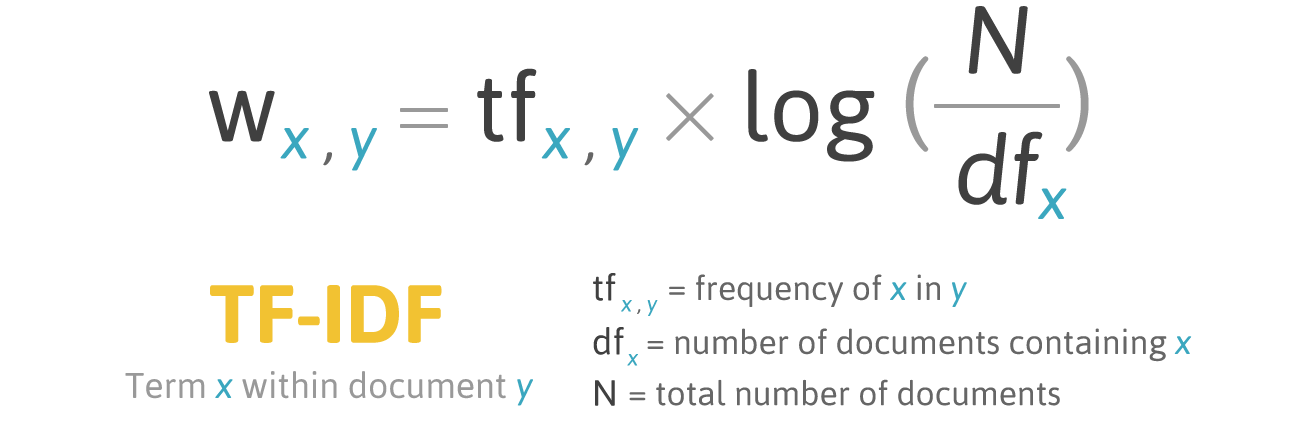

Por supuesto, BoW no es la única forma de caracterizar el texto. Otro método, que mencionamos brevemente antes, es el método **Término de frecuencia-frecuencia inversa del documento (TF-IDF)**. Esto evalúa qué tan importante es una palabra para un documento dentro de una gran colección de documentos (es decir, corpus). La importancia aumenta proporcionalmente en función del número de veces que aparece una palabra en el documento, pero se compensa con la frecuencia de la palabra en el corpus.

El peso TF-IDF es el producto de dos términos. El primero calcula la frecuencia de término normalizada (TF); es decir, el número de veces que aparece una palabra en un documento dividido por el número total de palabras en ese documento. El segundo término es la Frecuencia Inversa de Documentos (IDF), calculada como el logaritmo del número de documentos en el corpus dividido por el número de documentos donde aparece el término específico:

Volvamos a presentar nuestro conjunto original de revisiones basado en TF-IDF y dividamos las funciones resultantes en conjuntos de entrenamiento y prueba:

In [59]:
### Instanciando el objeto
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize,stop_words=noise_words,
                             ngram_range=(1,1))
tfidf_data = tfidf_counts.fit_transform(amazon_reviews.reviews_text_new)

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'might', 'must', "n't", 'need', 'sha', 'wo'] not in stop_words.
  warnings.warn(


In [60]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf =  \
                            train_test_split(tfidf_data,amazon_reviews.Sentiment_rating,test_size = 0.2,random_state = 0)

In [61]:
X_train_tfidf.shape

(7310, 17616)

### Aplicación de regresión logística a características TF-IDF

Aplicaremos el modelo de RL usando la TF-IDF:

In [62]:
### Definiendo el modelo
lr_model_tf_idf = LogisticRegression()

## Entrenando el modelo
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciendo los resultados
test_pred_lr_prob = lr_model_tf_idf.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluando el modelo
print("F1 score: ",f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

F1 score:  0.9335347432024169
Accuracy:  87.96498905908096


Incrementamos el accuracy con la TF-IDF comparando los resultados de BoW

### Ejercicio 7

Intente aumentar la precisión del modelo configurando `ngram_range=(1,4)` y no eliminando las palabras irrelevantes de antemano.

In [63]:
###Instanciando el objeto

tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))
tfidf_data = tfidf_counts.fit_transform(amazon_reviews.reviews_text_new)

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [64]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf =  \
                            train_test_split(tfidf_data,amazon_reviews.Sentiment_rating,test_size = 0.2,random_state = 0)

In [65]:
### Definiendo el modelo
lr_model_tf_idf_new = LogisticRegression(C = 1e2, penalty= 'l2')

## Entrenando
lr_model_tf_idf_new.fit(X_train_tfidf,y_train_tfidf)

## Prediciendo
test_pred_lr_prob = lr_model_tf_idf_new.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf_new.predict(X_test_tfidf)

## Evaluando
print("F1 score: ",f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

F1 score:  0.9420731707317074
Accuracy:  89.60612691466083


c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Obtenemos aun mejor valor de accuracy

In [66]:
lr_weights = pd.DataFrame(list(zip(tfidf_counts.get_feature_names_out(),
                                   lr_model_tf_idf_new.coef_[0])),
                          columns= ['words','weights'])

lr_weights.sort_values(['weights'],ascending = False)[:10]

words    weights
448809       great  16.027822
438773        good   9.497613
1023733   the best   9.267440
639088        love   9.124806
171393        best   8.912495
305794   delicious   8.869414
18182            a   8.021092
810997     perfect   7.736313
81880          and   7.511298
709971        nice   7.322419

In [67]:
lr_weights.sort_values(['weights'],ascending = False)[-10:]

words    weights
317336   disappointing  -7.123037
1201325           weak  -7.130872
1185315            was  -7.834622
1193585          waste  -8.066852
1206112           were  -8.217058
352214            even  -9.068557
982546               t  -9.369957
148156             bad  -9.402162
316985    disappointed -11.900248
716808             not -19.268364

In [94]:
# Como obtener predicciones
mensaje=['Good job i love it','Bad person','I love it', 'I dont like this product', 'Bad service']

df=pd.DataFrame()
df['mensaje']=mensaje
X_new=tfidf_counts.transform(df.mensaje)

print('Prediccion final del mensaje:', lr_model_tf_idf_new.predict(X_new))

Prediccion final del mensaje: [1 0 1 0 0]


In [68]:
import pickle
model_n= 'modelo_reg_logistica_final.pkl'
with open(model_n, 'wb') as f:
    pickle.dump(lr_model_tf_idf_new, f)

In [69]:
# Importar modelo entrenado
model_n= 'modelo_reg_logistica_final.pkl'
with open(model_n, 'rb') as f:
    modelo_nuevo=pickle.load(f, encoding='utf-8')

In [70]:
# Guardar el vectorizador
import joblib
joblib.dump(tfidf_counts,'vectorizador_tfidf.pkl')

['vectorizador_tfidf.pkl']

In [71]:
# Cargando vectorizador
import joblib
vectorizador= joblib.load('vectorizador_tfidf.pkl')

In [77]:
# Probando
mensaje = input('Ingresa un mensaje: ')

#df=pd.DataFrame()
#df['mensaje']=[mensaje]
X_new=vectorizador.transform([mensaje])

dict_transfer ={0:'Malo', 1:'Bueno'}

print('Prediccion final del mensaje:', dict_transfer[modelo_nuevo.predict(X_new)[0]])

Prediccion final del mensaje: Bueno


## Word embeddings

El tipo final de caracterización que cubriremos son las **Word Embeddings**. Este es un tipo de representación de palabras que permite que las palabras con un significado similar tengan una representación similar. Es este enfoque para representar palabras y documentos el que puede considerarse uno de los avances clave del aprendizaje profundo en los desafiantes problemas de procesamiento del lenguaje natural. Es capaz de captar el contexto de una palabra en un documento, su similitud semántica y sintáctica, y su relación con otras palabras. Las incrustaciones de palabras son, de hecho, una clase de técnicas en las que las palabras individuales se representan como vectores de valores reales en un espacio vectorial predefinido.

En la siguiente imagen, cada una de las palabras se ha representado en 2 dimensiones para simplificar. Se puede ver claramente que las palabras con un contexto similar se agrupan: el baño, la cocina, la bañera se agrupan, mientras que el microondas, el refrigerador, el horno forman otro grupo, etc.

In [78]:
from IPython.display import Image
from IPython.core.display import HTML

Existen diferentes métodos para aprender incrustaciones de palabras: Word2Vec, GloVe, FastText. **Word2Vec** utiliza una red neuronal superficial y es de dos tipos; _CBOW_ y _Skip Gram_. **GloVe** es un algoritmo de aprendizaje no supervisado para obtener representaciones vectoriales de palabras. El entrenamiento se realiza en estadísticas globales agregadas de coocurrencia palabra-palabra de un corpus, y las representaciones resultantes muestran subestructuras lineales interesantes del espacio vectorial de palabras. **fastText** es una biblioteca para aprender incrustaciones de palabras y clasificación de texto creada por el laboratorio de investigación de IA de Facebook.

### ¿Por qué usar incrustaciones de palabras en lugar de bolsa de palabras y TF-IDF?

Cada palabra está representada por un vector de valor real, que generalmente tiene decenas o cientos de dimensiones. Esto contrasta con los miles o millones de dimensiones requeridas para las representaciones de palabras dispersas. Por lo tanto, las incrustaciones de palabras pueden reducir drásticamente la cantidad de dimensiones requeridas para representar un documento de texto:

In [79]:
!pip install gensim

You should consider upgrading via the 'c:\users\david\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [80]:
import gensim

In [40]:
os.path.join(os.getcwd(), 'glove.twitter.27B.200d_out.txt')

'c:\\Users\\Windows\\Desktop\\Bootcamp-DS-2023-II\\Clase 26 - 2 Oct 2023\\glove.twitter.27B.200d_out.txt'

**Se demora la carga 3 min**

In [81]:
### Cargando una incrustación de palabras de guante previamente entrenada que está entrenada en el conjunto de datos de Twitter
### Esta palabra incrustada tiene una longitud de 200 dimensiones
model = gensim.models.KeyedVectors.load_word2vec_format(
    os.path.join(os.getcwd(), 'glove.twitter.27B.200d_out.txt'), binary=False,
    unicode_errors='ignore')

Teníamos aproximadamente 18 000 tokens distintos para características de 1-grams en la representación de la bolsa de palabras, pero solo tendrán 200 dimensiones en esta inserción de palabras. ¡Esta es una gran diferencia!

Además, las incrustaciones de palabras capturan el contexto y la semántica de las oraciones, ya que cada representación de vector de palabra se basa en su significado contextual.

A continuación se muestra la representación vectorial de "comida" y "genial":

In [82]:
print("El embedding para food es",len(model['food']),"dimensional")

model['boy']

El embedding para food es 200 dimensional


array([-1.7837e-02, -4.9568e-01,  4.3744e-02,  1.1630e-01, -2.2966e-01,
        4.5057e-02,  2.0280e-01,  1.8644e-01, -3.0110e-01, -2.2982e-01,
       -3.8870e-01,  2.8716e-01, -1.5280e-01,  1.3628e-01,  4.2827e-01,
       -4.3443e-02,  2.6092e-01,  1.5900e-01,  4.6358e-01, -8.2509e-01,
        1.8896e-01,  3.1175e-01, -1.8498e-02,  3.1782e-01, -2.5441e-01,
        1.1887e-01, -1.4934e-01,  2.5256e-02, -2.4041e-01, -5.5415e-01,
        2.1876e-01,  1.5619e-01, -1.2082e-01,  1.9686e-01, -1.3375e-01,
        6.1841e-01, -1.6659e-01, -3.8943e-01, -4.3892e-02, -2.7513e-01,
       -1.3892e-01, -3.4701e-01, -2.4124e-01, -2.1856e-01, -3.4063e-01,
       -2.6282e-01,  2.2268e-01,  3.9543e-01,  1.6489e-01,  2.0338e-01,
       -4.1898e-01, -2.7428e-01, -1.7890e-01, -4.0086e-01, -3.3171e-01,
        9.5008e-02,  6.5329e-02,  3.0277e-01, -3.0255e-01,  5.6879e-02,
        1.5143e-01,  1.5631e-02,  2.3922e-01, -2.6324e-01, -1.5851e-01,
       -2.4222e-01,  1.7235e-01,  5.7483e-01,  3.7917e-02,  1.07

In [83]:
print("El embedding para great es",len(model['great']),"dimensional")

model['david']

El embedding para great es 200 dimensional


array([-5.8444e-02, -2.7107e-01, -1.6355e-01,  1.8157e-02, -6.3311e-01,
       -1.6805e-01, -1.1565e-01, -2.8428e-01,  8.3156e-02, -1.2587e-01,
        3.2645e-01,  2.0167e-01, -5.5617e-01, -2.9360e-01,  3.6728e-01,
        2.0226e-01,  3.0539e-01,  1.6539e-01,  7.8616e-01,  1.0897e-01,
       -1.4187e-01, -1.5634e-02,  1.4867e-01, -3.7349e-01, -3.1318e-01,
       -1.0384e+00,  2.8103e-01,  5.3942e-01, -3.1911e-01, -4.1998e-02,
        4.3780e-01,  1.6181e-01, -3.1486e-01,  4.8686e-01,  5.3318e-01,
        3.8721e-01,  6.1277e-02, -6.6646e-02,  1.2850e-01, -1.3476e-01,
        2.2572e-01, -2.7860e-01,  1.7714e-01,  7.1434e-02, -1.0712e+00,
        4.6368e-02,  1.6558e-02,  2.3381e-01,  3.3634e-01,  1.6915e-01,
       -1.0896e-01, -3.6014e-02,  2.2121e-01, -6.5253e-02, -6.0141e-01,
       -1.3663e-01, -1.0937e-01, -3.2753e-01,  2.7619e-01, -4.8823e-01,
       -1.0197e-01,  5.5587e-02, -4.1772e-01, -2.0069e-01,  3.5726e-01,
        2.5579e-01, -2.8487e-01, -2.5780e-01, -1.6852e-01,  4.31

$$Cosine_S= \frac{A.B}{||A|| ||B||}$$

```python
A=[1,2]
B=[3,4]
num= 1*3+ 2*4
norma_A= np.sqrt(1^2+ 2^2)
norma_B= np.sqrt(3^2+ 4^2)
```

In [88]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

print('Similitud entre las palabras: ', cosine_similarity(model['king'].reshape(1,-1),model['is'].reshape(1,-1))[0][0])

Similitud entre las palabras:  0.5533259


Para encontrar el vector de una reseña completa, obtenemos el vector de cada palabra de la reseña por separado y tomamos un promedio simple.

### Ejercicio 8

Calcule el vector para cada revisión individual en el conjunto de datos.

In [89]:
amazon_reviews.reviews_text_new

0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price   there was a wid...
                              ...                        
9995    we switched from the advance similac to the or...
9996    like the bad reviews say  the organic formula ...
9997    i wanted to solely breastfeed but was unable t...
9998    i love the fact that i can get this delieved t...
9999    we have a 7 week old  he had gas and constipat...
Name: reviews_text_new, Length: 9138, dtype: object

In [46]:
np.zeros(model.vector_size)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
'T~€€€€'.lower() in model

False

In [96]:
review_embeddings = []
for each_review in amazon_reviews.reviews_text_new:
    ##Promedio
    Review_average = np.zeros(model.vector_size)
    count_val = 0
    for each_word in word_tokenize(each_review):
        if(each_word.lower() in model):
            Review_average =+ model[each_word.lower()]
            count_val += 1    
    review_embeddings.append(list(Review_average/count_val))

In [49]:
print(review_embeddings[1])

[-0.0069338707, 0.0109735485, -0.0074483873, -0.009642257, 0.0007093548, 0.007843548, -0.016697742, -0.008016774, 0.0055990326, -0.0018785484, -0.014637419, 0.037770968, 0.002461613, -0.011641613, -0.008077742, 0.01653387, 0.021711936, 0.0036799998, 0.0059041935, -0.016605161, -0.01705129, -0.001830871, 0.006870645, -0.004980645, 0.011100968, -0.0050341934, 0.0025990321, 0.000834, -0.0091441935, -0.017999677, 0.0059141936, 0.0047858064, 0.015092904, -0.024183225, -0.002514613, 0.0011022903, 0.004021613, 0.004002258, 0.012407742, 0.02496387, -0.01091613, -0.011895483, 0.013316452, 0.003188, 0.007913225, -0.0153264515, -0.013282258, 0.018768387, 0.0117741935, 0.006799032, -0.0040477416, -0.012122581, -0.016090322, 0.015198709, -0.0041941935, 0.0020041612, 0.010950969, -0.011898065, -0.0040858067, 0.0044712904, -0.00792742, 0.0010545483, 0.0048974194, -0.0003110839, -0.009251935, 0.0012116774, 0.0039012902, -0.002414129, 0.006258387, 0.0035758065, -0.01764871, -0.008486775, -0.015490646, 

Convirtamos la lista de representaciones vectoriales para cada revisión en un DataFrame y dividámoslo en conjuntos de entrenamiento y prueba:

In [97]:
embedding_data = pd.DataFrame(review_embeddings)
embedding_data = embedding_data.fillna(0)

In [98]:
print(embedding_data.shape)
embedding_data.head()

(9138, 200)


0         1         2         3         4         5         6    \
0  0.020265 -0.001459  0.006446  0.005965  0.012804 -0.001794  0.004769   
1 -0.006934  0.010974 -0.007448 -0.009642  0.000709  0.007844 -0.016698   
2 -0.001874 -0.006202 -0.000801  0.006205 -0.002987  0.003152  0.009835   
3 -0.029537 -0.021714 -0.003155 -0.002398  0.005568 -0.008651  0.002246   
4 -0.011517 -0.002077 -0.008900  0.004536 -0.013394 -0.014427  0.010721   

        7         8         9    ...       190       191       192       193  \
0  0.006757  0.007364  0.008295  ... -0.003571 -0.001456  0.000690 -0.002067   
1 -0.008017  0.005599 -0.001879  ...  0.008169 -0.009775 -0.018887  0.002282   
2  0.001136  0.000545 -0.005018  ...  0.005494 -0.002714  0.004914 -0.001100   
3  0.001636 -0.007645 -0.016403  ... -0.023752  0.006511  0.016450 -0.010843   
4 -0.009569 -0.005949  0.003639  ... -0.012828 -0.006852  0.004933 -0.007529   

        194       195       196       197       198       199  
0 -0.003893  0.002255 -0.007418  0.003759 -0.003294 -0.003521  
1  0.006575  0.005485  0.005419  0.027662 -0.000816  0.001488  
2  0.001218  0.001272  0.003792 -0.003057  0.002701 -0.008601  
3  0.006128  0.014590  0.006528 -0.004071  0.007111 -0.001967  
4  0.003032  0.013365 -0.007860  0.026389  0.014015  0.024893  

[5 rows x 200 columns]

In [99]:
X_train_embed, X_test_embed, y_train_embed, y_test_embed =  \
                            train_test_split(embedding_data,amazon_reviews.Sentiment_rating,test_size = 0.2,random_state = 0)

Apliquemos ahora la regresión logística a nuestra representación de incrustaciones de palabras:

In [100]:
lr_model_all = LogisticRegression(C = 1)
#lr_model_all.fit(X_train_bow,y_train_bow)
lr_model_all.fit(X_train_embed,y_train_embed)
test_pred_lr_prob = lr_model_all.predict_proba(X_test_embed)
test_pred_lr_all = lr_model_all.predict(X_test_embed)

print("F1 score: ",f1_score(y_test_embed,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_embed,test_pred_lr_all)* 100)

F1 score:  0.9177027827116636
Accuracy:  84.79212253829321


Bueno los resultados son similares al de otros modelos, en contextos con más información es posible alcanzar un mejor performance usando los embeddings en comparación con la TF-IDF y el BoW

## Conclusiones

En este caso, limpiamos y destacamos un conjunto de datos de reseñas de Amazon y construimos algunos modelos de clasificación en estas características para predecir el sentimiento. Vimos que BoW y TF-IDF brindaban características interpretables, mientras que las incrustaciones de palabras algo similar. Al aumentar el conjunto de n-gramas que usamos de 1.gram a 4-grams, pudimos obtener la precisión de nuestro modelo de regresión logística hasta en un 92 %.

## Para recordar

La construcción de modelos de aprendizaje automático en texto es una disciplina muy complicada. Algunas cosas importantes a tener en cuenta son las siguientes:

1. Aunque existen diferentes tipos de preprocesamiento en los datos textuales, no todo tiene que aplicarse en cada caso. Por ejemplo, cuando se trata de mensajes de texto, los caracteres especiales pueden representar información importante y no es necesario eliminarlos. Además, las mayúsculas pueden significar que alguien está enojado y representa un grito, por lo que es posible que tampoco sea necesario normalizar las mayúsculas.

2. El ajuste de hiperparámetros en modelos de aprendizaje automático es un paso muy importante. No podemos seguir entrenando un modelo con parámetros predeterminados. Se deben probar diferentes conjuntos de parámetros para ver qué contribuye al mejor modelo.

3. Cada tarea de clasificación de NLP es diferente, pero el proceso a seguir es similar al que hicimos en este caso: Data wrangling -> crear características a partir del texto -> entrenar modelos ML.